## - Data Overview

#### General Information:
- **Number of Rows:** 7,043<br>
- **Number of Columns:** 21<br>

#### Data Description:
1. **Customer Demographics:**<br>
   - `customerID`: Unique identifier for each customer (string).<br>
   - `gender`: Gender of the customer (`Female`, `Male`).<br>
   - `SeniorCitizen`: Indicator if the customer is a senior citizen (integer, 0 = No, 1 = Yes).<br>
   - `Partner`: Whether the customer has a partner (`Yes`, `No`).<br>
   - `Dependents`: Whether the customer has dependents (`Yes`, `No`).<br>

2. **Service Usage and Preferences:**<br>
   - `tenure`: Number of months the customer has been with the company (integer).<br>
   - `PhoneService`: If the customer has phone service (`Yes`, `No`).<br>
   - `MultipleLines`: If the customer has multiple lines (`Yes`, `No`, `No phone service`).<br>
   - `InternetService`: Type of internet service (`DSL`, `Fiber optic`, `No`).<br>
   - `OnlineSecurity`: If the customer has online security (`Yes`, `No`, `No internet service`).<br>
   - `OnlineBackup`: If the customer has online backup (`Yes`, `No`, `No internet service`).<br>
   - `DeviceProtection`: If the customer has device protection (`Yes`, `No`, `No internet service`).<br>
   - `TechSupport`: If the customer has technical support (`Yes`, `No`, `No internet service`).<br>
   - `StreamingTV`: If the customer streams TV (`Yes`, `No`, `No internet service`).<br>
   - `StreamingMovies`: If the customer streams movies (`Yes`, `No`, `No internet service`).<br>

3. **Contract and Billing Information:**<br>
   - `Contract`: Customer’s contract type (`Month-to-month`, `One year`, `Two year`).<br>
   - `PaperlessBilling`: If the customer is on paperless billing (`Yes`, `No`).<br>
   - `PaymentMethod`: Method of payment (`Electronic check`, `Mailed check`, `Bank transfer`, `Credit card`).<br>
   - `MonthlyCharges`: Amount charged to the customer monthly (float).<br>
   - `TotalCharges`: Total amount charged to the customer (float).<br>

4. **Customer Churn:**<br>
   - `Churn`: Whether the customer churned (`Yes`, `No`).

### **1. Initial Setup**
1. **Load Libraries** 

In [62]:
import polars as pl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.impute import SimpleImputer
from scipy.stats import chi2_contingency, ttest_ind, f_oneway, spearmanr

### 2. **Dataset Overview**<br>
####   - Display the first few rows: 

In [54]:
df = pl.read_csv('C:\\Users\\TMB CO\\Desktop\\GitHub Projects\\REAL-TIME-MACHINE-LEARNING-SYSTEM\\Notebooks\\Telco-Customer-Churn.csv')
df.head()

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
str,str,i64,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,str
"""7590-VHVEG""","""Female""",0,"""Yes""","""No""",1,"""No""","""No phone service""","""DSL""","""No""","""Yes""","""No""","""No""","""No""","""No""","""Month-to-month""","""Yes""","""Electronic check""",29.85,29.85,"""No"""
"""5575-GNVDE""","""Male""",0,"""No""","""No""",34,"""Yes""","""No""","""DSL""","""Yes""","""No""","""Yes""","""No""","""No""","""No""","""One year""","""No""","""Mailed check""",56.95,1889.5,"""No"""
"""3668-QPYBK""","""Male""",0,"""No""","""No""",2,"""Yes""","""No""","""DSL""","""Yes""","""Yes""","""No""","""No""","""No""","""No""","""Month-to-month""","""Yes""","""Mailed check""",53.85,108.15,"""Yes"""
"""7795-CFOCW""","""Male""",0,"""No""","""No""",45,"""No""","""No phone service""","""DSL""","""Yes""","""No""","""Yes""","""Yes""","""No""","""No""","""One year""","""No""","""Bank transfer (automatic)""",42.3,1840.75,"""No"""
"""9237-HQITU""","""Female""",0,"""No""","""No""",2,"""Yes""","""No""","""Fiber optic""","""No""","""No""","""No""","""No""","""No""","""No""","""Month-to-month""","""Yes""","""Electronic check""",70.7,151.65,"""Yes"""


#### - Analyze dataset dimensions, column names, datatypes, duplicates and nulls: 

In [56]:
df.columns

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [58]:
df.glimpse(max_items_per_column=3)

Rows: 7043
Columns: 21
$ customerID       <str> '7590-VHVEG', '5575-GNVDE', '3668-QPYBK'
$ gender           <str> 'Female', 'Male', 'Male'
$ SeniorCitizen    <i64> 0, 0, 0
$ Partner          <str> 'Yes', 'No', 'No'
$ Dependents       <str> 'No', 'No', 'No'
$ tenure           <i64> 1, 34, 2
$ PhoneService     <str> 'No', 'Yes', 'Yes'
$ MultipleLines    <str> 'No phone service', 'No', 'No'
$ InternetService  <str> 'DSL', 'DSL', 'DSL'
$ OnlineSecurity   <str> 'No', 'Yes', 'Yes'
$ OnlineBackup     <str> 'Yes', 'No', 'Yes'
$ DeviceProtection <str> 'No', 'Yes', 'No'
$ TechSupport      <str> 'No', 'No', 'No'
$ StreamingTV      <str> 'No', 'No', 'No'
$ StreamingMovies  <str> 'No', 'No', 'No'
$ Contract         <str> 'Month-to-month', 'One year', 'Month-to-month'
$ PaperlessBilling <str> 'Yes', 'No', 'Yes'
$ PaymentMethod    <str> 'Electronic check', 'Mailed check', 'Mailed check'
$ MonthlyCharges   <f64> 29.85, 56.95, 53.85
$ TotalCharges     <f64> 29.85, 1889.5, 108.15
$ Churn            <str

In [67]:
df.is_duplicated().sum()

0

In [73]:
# Calculate percentage of missing values for each column
missing_percentages = df.select([
    (pl.col(col).is_null().sum() / df.height * 100).alias(col) for col in df.columns
])

# Transpose the DataFrame
missing_summary = (
    missing_percentages.transpose(include_header=True)
    .rename({
        "column": "Column Name",
        "column_0": "Missing (%)"
    })
)

# Print the result
missing_summary

Column Name,Missing (%)
str,f64
"""customerID""",0.0
"""gender""",0.0
"""SeniorCitizen""",0.0
"""Partner""",0.0
"""Dependents""",0.0
…,…
"""PaperlessBilling""",0.0
"""PaymentMethod""",0.0
"""MonthlyCharges""",0.0


### **2. Descriptive Analysis**
1. **Categorical Features**  
   - Frequency tables and bar plots:

In [76]:
# List of categorical columns excluding 'customerID'
categorical_columns = [col for col in df.columns if df[col].dtype == pl.Utf8 and col != "customerID"]


def calculate_percentage_share(df, categorical_columns):
    """
    Calculate percentage share for each categorical column in the DataFrame.
    
    Args:
        df: The DataFrame to process.
        categorical_columns: List of categorical columns to analyze.
    
    Returns:
        A dictionary where keys are column names and values are DataFrames with counts and percentages.
    """
    results = {}
    
    for col in categorical_columns:
        # Group by the column and calculate counts
        grouped = df.group_by(col).agg(pl.len().alias("Count"))
        
        # Calculate the total count for the column
        total_count = grouped["Count"].sum()
        
        # Add percentage column
        grouped = grouped.with_columns(
            ((grouped["Count"] / total_count) * 100).round(2).alias("Percentage")
        )
        
        # Store the result
        results[col] = grouped
    
    return results

In [78]:
# Calculate percentage share
result = calculate_percentage_share(df, categorical_columns)

# Display results
for column, data in result.items():
    print(f"Percentage share for {column}:\n{data}\n")


Percentage share for gender:
shape: (2, 3)
┌────────┬───────┬────────────┐
│ gender ┆ Count ┆ Percentage │
│ ---    ┆ ---   ┆ ---        │
│ str    ┆ u32   ┆ f64        │
╞════════╪═══════╪════════════╡
│ Female ┆ 3488  ┆ 49.52      │
│ Male   ┆ 3555  ┆ 50.48      │
└────────┴───────┴────────────┘

Percentage share for Partner:
shape: (2, 3)
┌─────────┬───────┬────────────┐
│ Partner ┆ Count ┆ Percentage │
│ ---     ┆ ---   ┆ ---        │
│ str     ┆ u32   ┆ f64        │
╞═════════╪═══════╪════════════╡
│ No      ┆ 3641  ┆ 51.7       │
│ Yes     ┆ 3402  ┆ 48.3       │
└─────────┴───────┴────────────┘

Percentage share for Dependents:
shape: (2, 3)
┌────────────┬───────┬────────────┐
│ Dependents ┆ Count ┆ Percentage │
│ ---        ┆ ---   ┆ ---        │
│ str        ┆ u32   ┆ f64        │
╞════════════╪═══════╪════════════╡
│ No         ┆ 4933  ┆ 70.04      │
│ Yes        ┆ 2110  ┆ 29.96      │
└────────────┴───────┴────────────┘

Percentage share for PhoneService:
shape: (2, 3)
┌─────

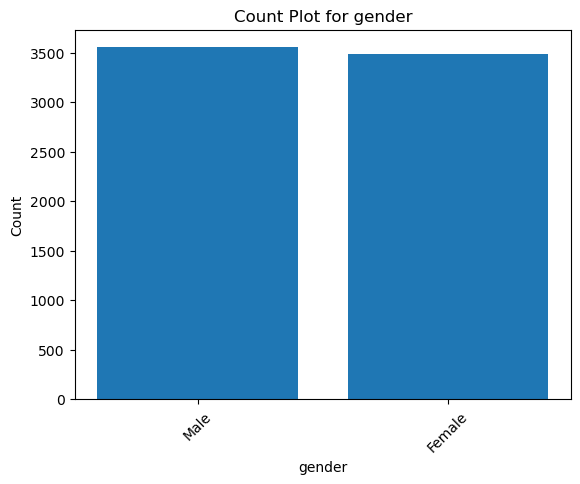

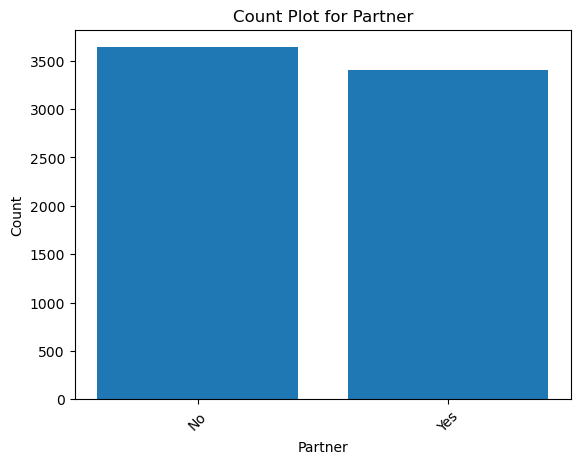

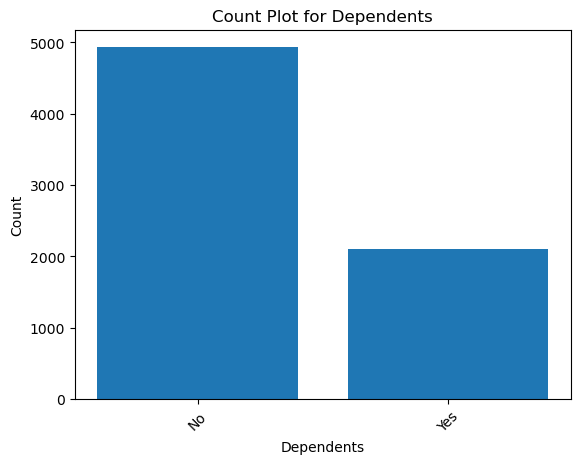

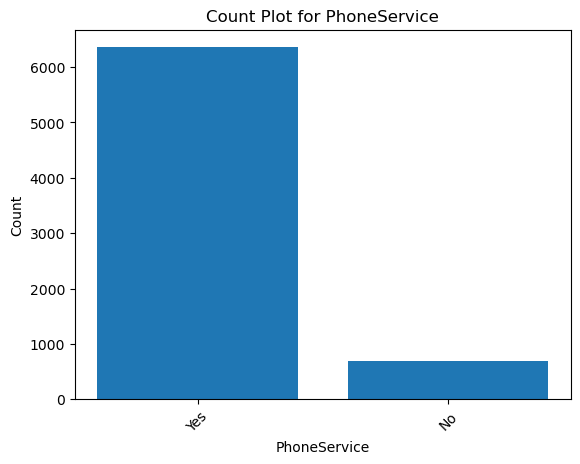

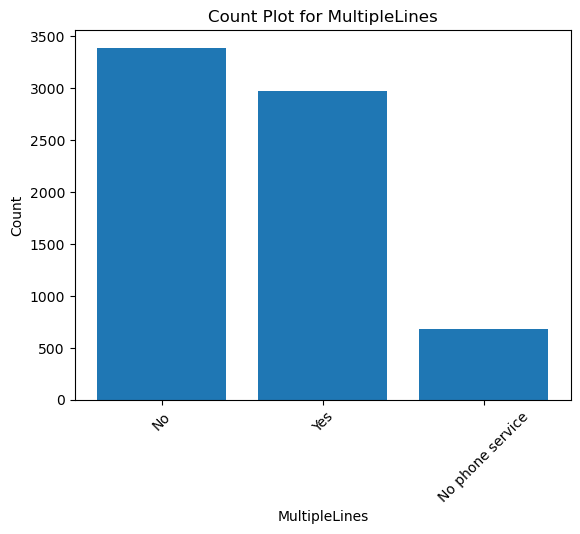

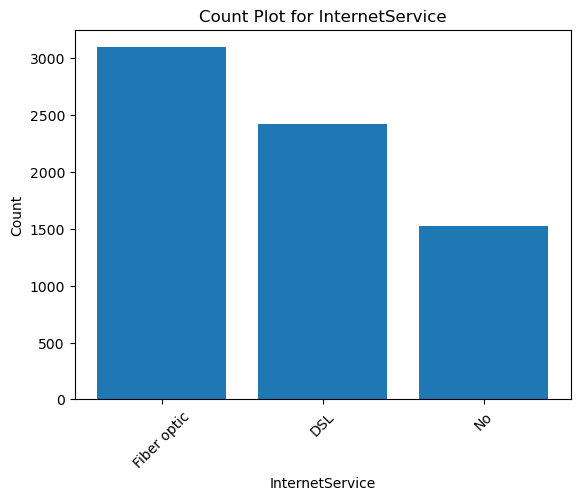

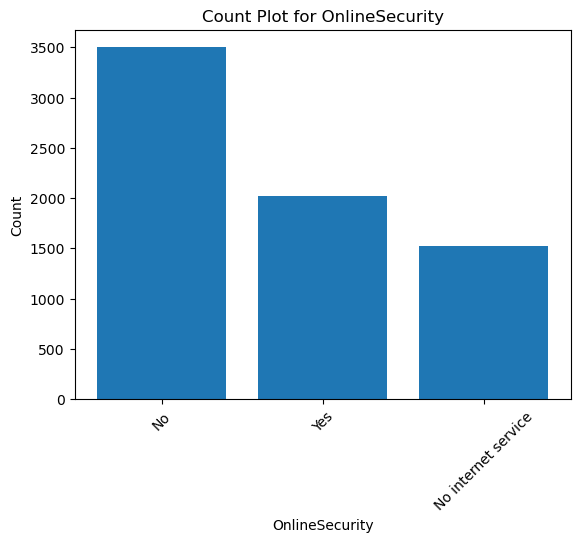

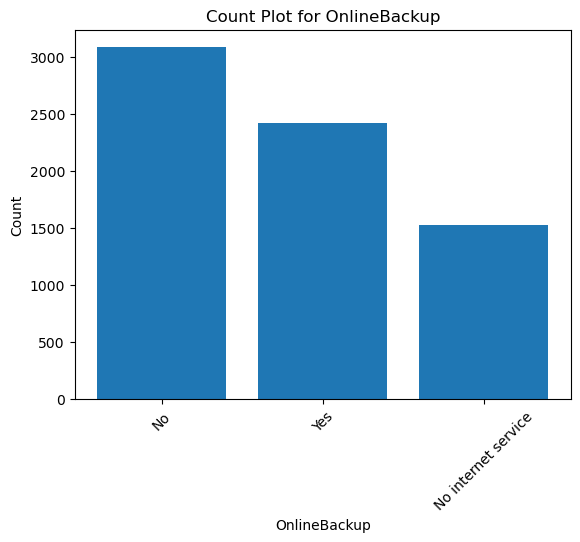

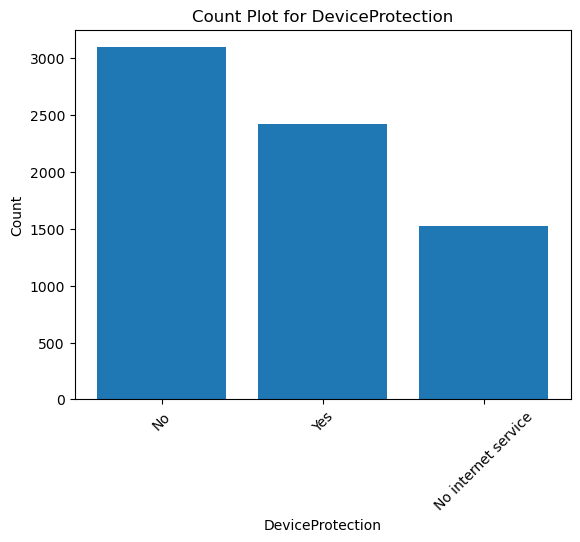

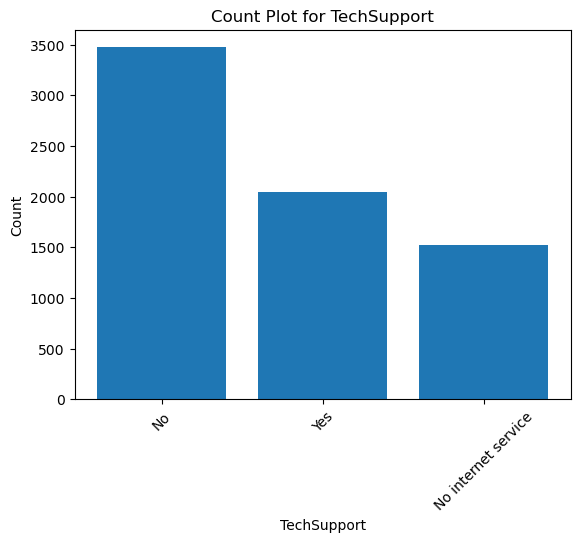

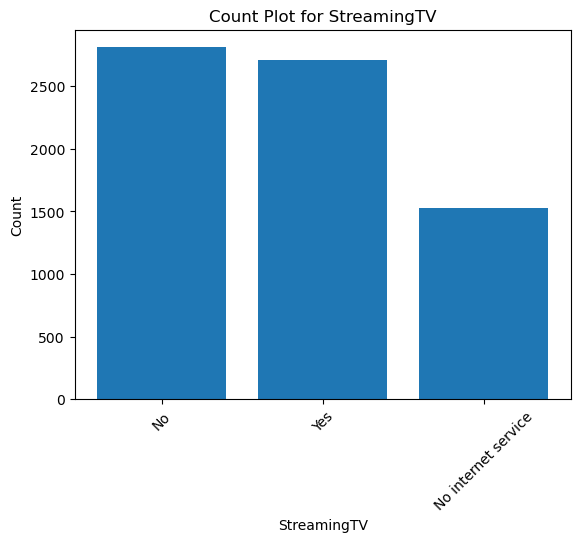

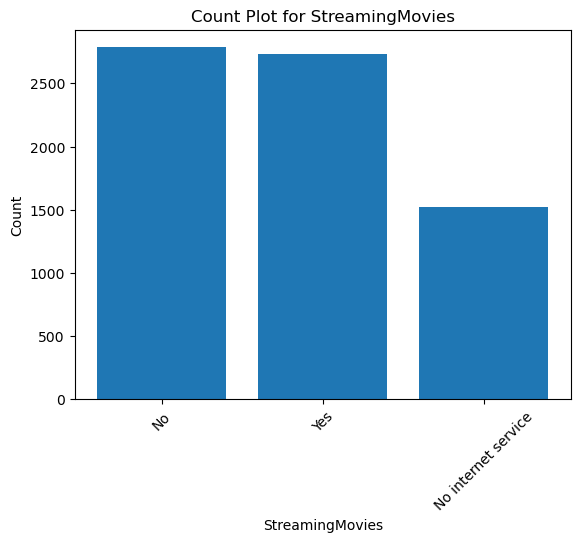

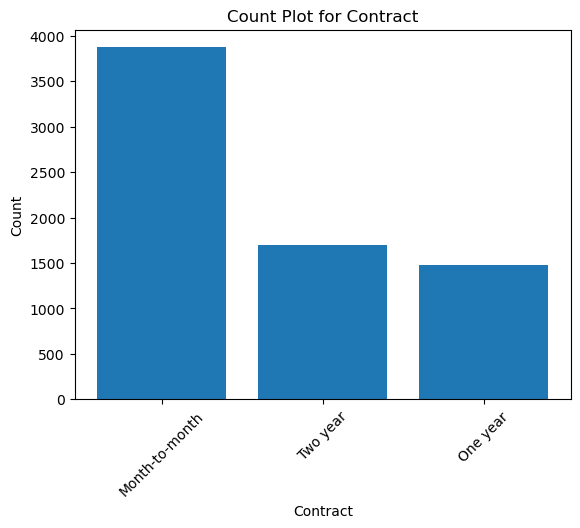

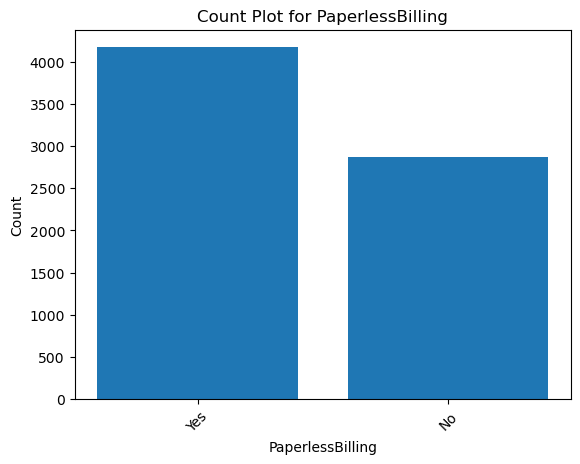

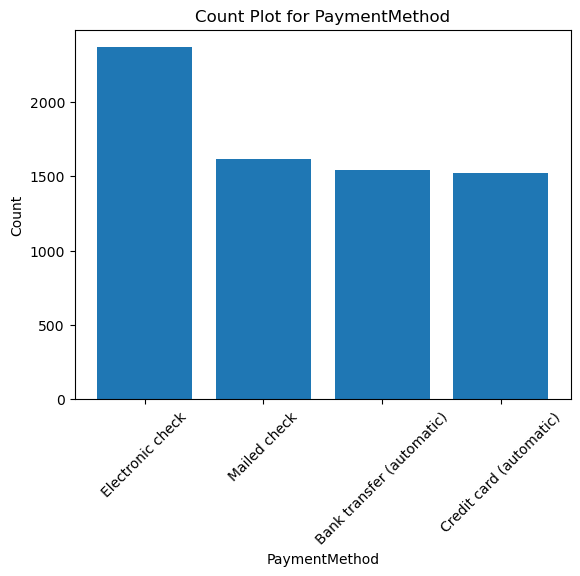

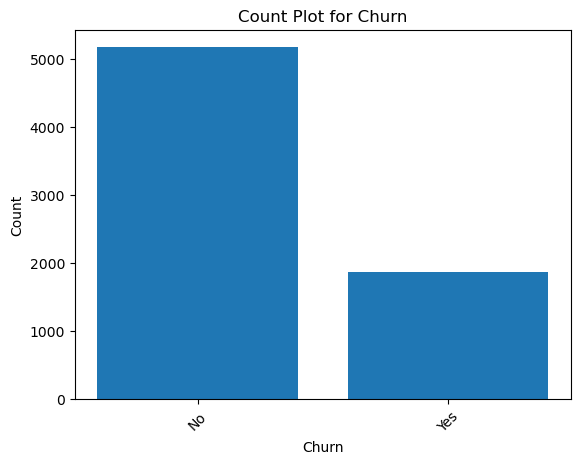

In [136]:
import polars as pl
import matplotlib.pyplot as plt

# Assuming df is a polars DataFrame
for col in categorical_columns:
    # Get value counts for the column using polars
    value_counts = (
        df.group_by(col)
        .agg(pl.col(col).count().alias('count'))
        .sort('count', descending=True)
    )

    # Plot using matplotlib directly from polars DataFrame
    value_counts = value_counts.to_pandas()  # Convert to pandas only for plotting
    
    plt.bar(value_counts[col], value_counts['count'])
    plt.title(f'Count Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.show()
